# Instagram Spammer Detection


### Start by reading in the training and test sets using pandas.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/freeboy/Uni /project/train.csv')
df.tail()

tdf = pd.read_csv('/Users/freeboy/Uni /project/test.csv')


### Seperate the feature vectors from their associated classed for both the training and test sets.

In [3]:
from sklearn.model_selection import train_test_split

# split training set into feature and corresponding class vectors
X_train = df.iloc[:, :11]
y_train = df.iloc[:, 11]

# split test set into feature and corresponding class vectors
X_test = tdf.iloc[:, :11]
y_test = tdf.iloc[:, 11]

print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y_train: [288 288]
Labels counts in y_test: [60 60]


### Fit a standard scaler on the training set and then use it on the test set to standardize the data. SVMs and Neural Networks are sensitive to unscaled data.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# from joblib import dump, load
# dump(sc, 'scaler.joblib') 

### Train our first model using SVMs.

In [5]:
from sklearn import svm

# instantiate an SVM classifier
svm_clf = svm.SVC()
# train the classifier with the training feature vector
svm_clf.fit(X_train_std, y_train)  

from sklearn.metrics import accuracy_score
# use the classifier to make predictions on test data
y_pred = svm_clf.predict(X_test_std)
print ('Test misclassified samples: %d' % (y_test != y_pred).sum())
print('Test accuracy: %.2f' % accuracy_score(y_test, y_pred))

# record the incorrectly classified test samples' indices
errorList = list()
for idx, row in enumerate(X_test_std):
    for targIdx, target in enumerate(y_test):
        if idx == targIdx:
            if target != y_pred[targIdx]:
                errorList.append(idx)
print('Indices of incorrectly classified test samples: %s' % errorList)


# from joblib import dump, load
# dump(clf, 'SVM_model.joblib') 

Test misclassified samples: 14
Test accuracy: 0.88
Indices of incorrectly classified test samples: [0, 4, 20, 28, 82, 86, 88, 90, 93, 94, 102, 110, 111, 117]


In [6]:
# print(clf)

---
### The second model will be a Decision Tree.

In [19]:
from sklearn import tree

# instantiate a decision tree classifier
tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
# train the classifier
tree_clf = tree_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# use the classifier to make predictions on test data
y_pred = tree_clf.predict(X_test)
print ('Test misclassified samples: %d' % (y_test != y_pred).sum())
print('Test accuracy: %.2f' % accuracy_score(y_test, y_pred))

# record the incorrectly classified test samples' indices
errorList = list()
for idx, row in enumerate(X_test):
    for targIdx, target in enumerate(y_test):
        if idx == targIdx:
            if target != y_pred[targIdx]:
                errorList.append(idx)
print('Indices of incorrectly classified test samples: %s' % errorList)

# from joblib import dump, load
# dump(clf, 'tree_Model.joblib') 
# # dump(sc, 'scaler.joblib') 

Test misclassified samples: 9
Test accuracy: 0.93
Indices of incorrectly classified test samples: []


In [9]:
# print(clf)

### Visualize, save and display the decision tree.

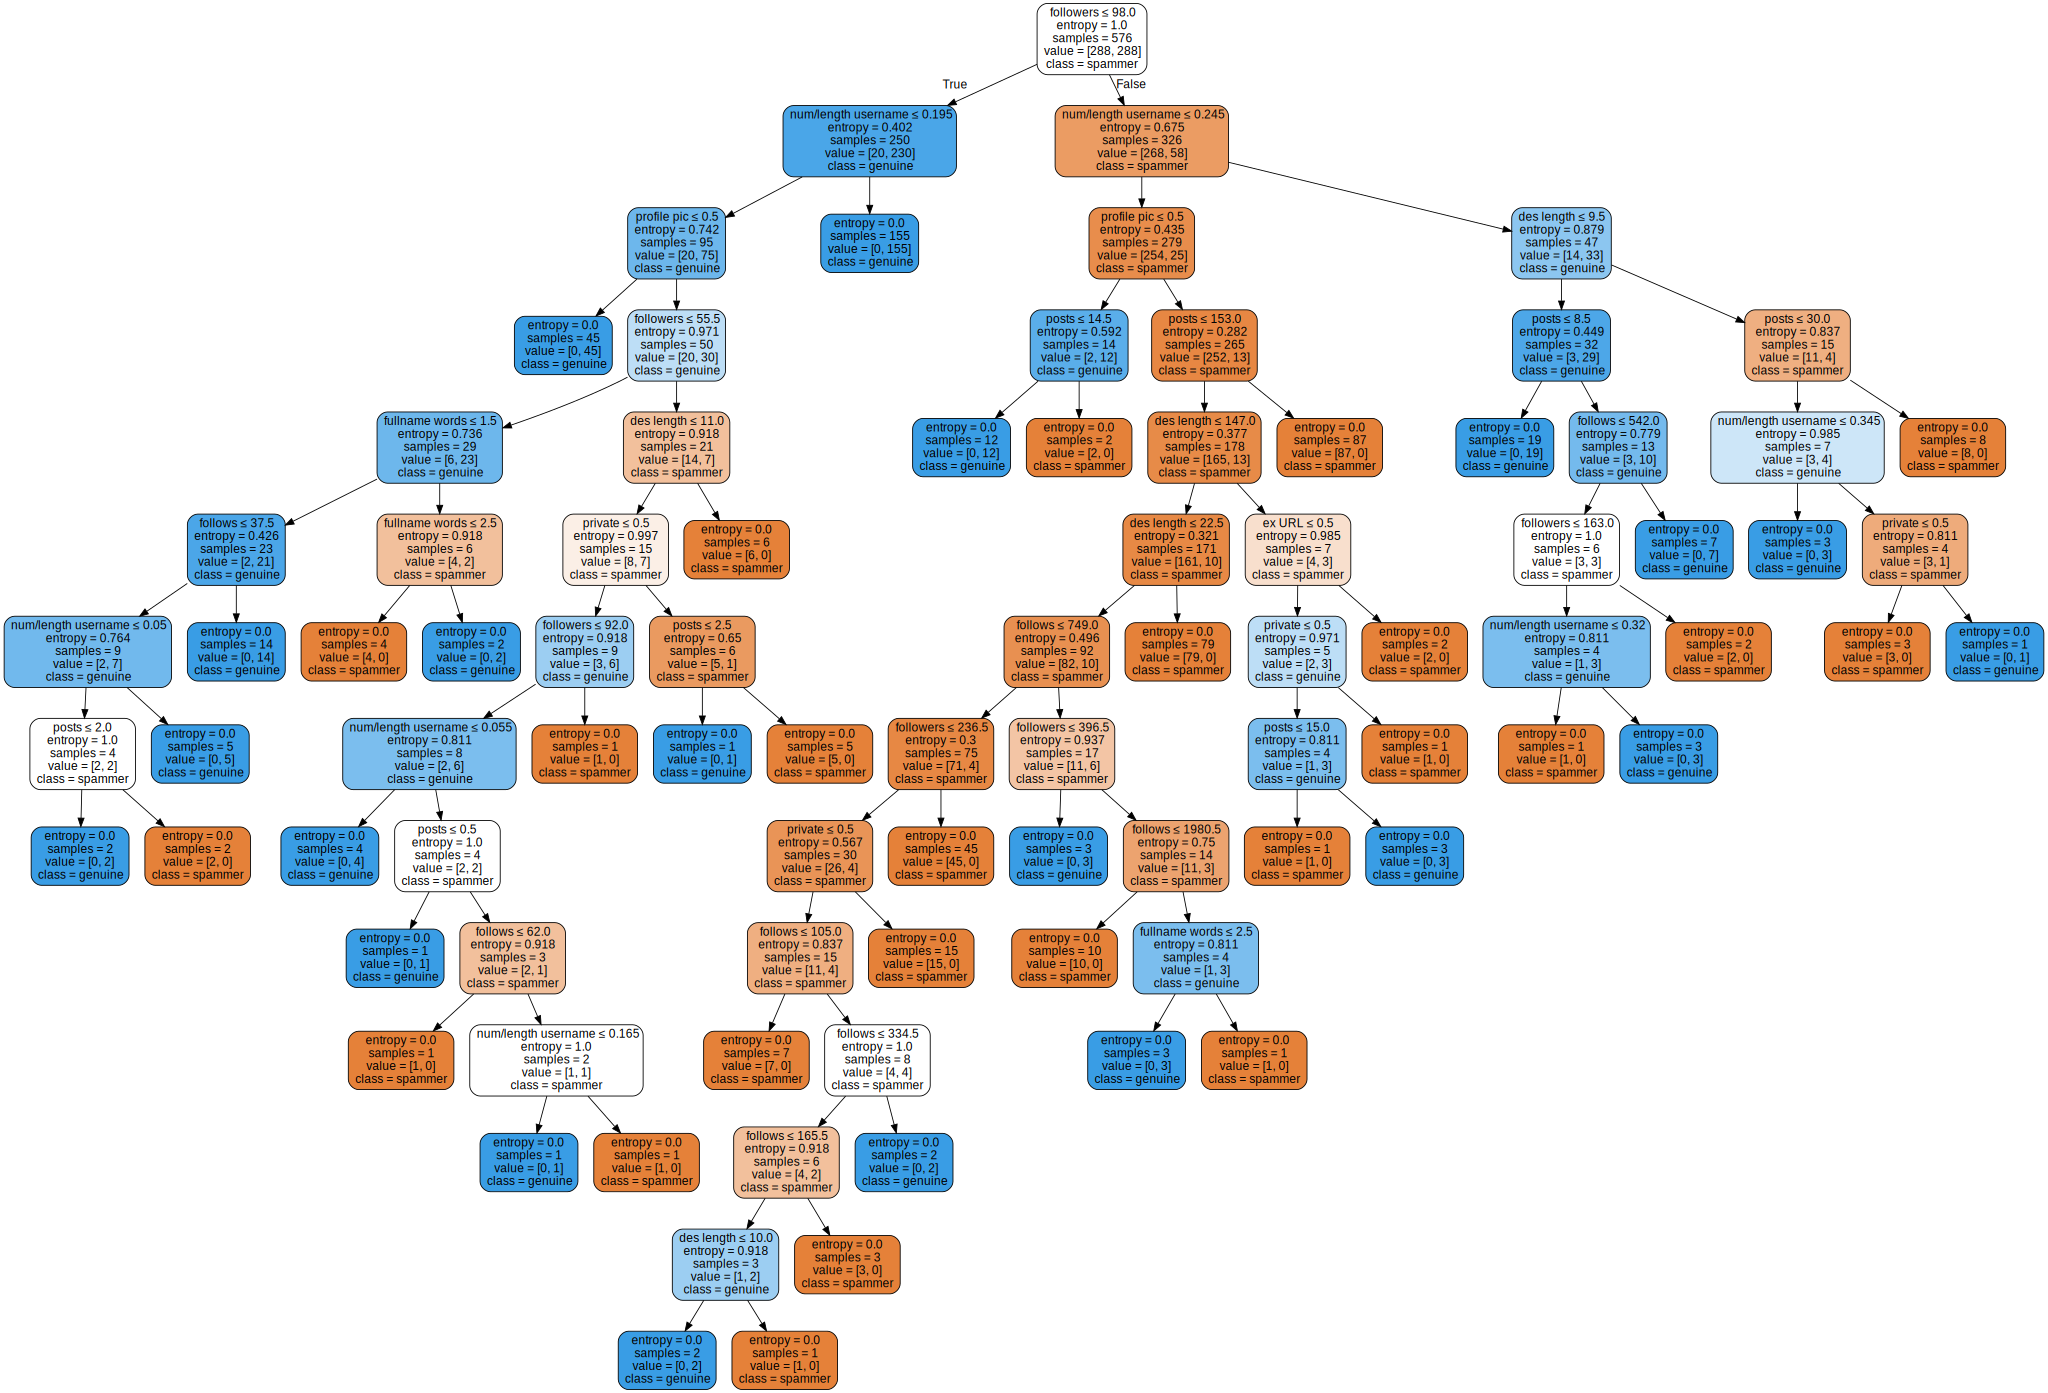

In [11]:
import graphviz 

# visualising our tree classifier
dot_data = tree.export_graphviz(tree_clf, out_file=None,feature_names=[
    'profile pic', 'num/length username', 'fullname words', 'num/length fullname', 'fullname==username',
    'des length', 'ex URL', 'private', 'posts', 'followers', 'follows'
    ], class_names=['spammer', 'genuine'],  
     filled=True, rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data)
# saving the graph to an output file
graph.render("instagram-dt") 
graph

---
### And here we train our last model using Neural Networks.

In [12]:
from sklearn.neural_network import MLPClassifier

# instantiate a MLP
MLP_clf = MLPClassifier(
    solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(13, 2), random_state=1,
)
# train the MLP
MLP_clf.fit(X_train_std, y_train)

# predict classed of the test set
y_pred = MLP_clf.predict(X_test_std)
print ('Test misclassified samples: %d' % (y_test != y_pred).sum())
print('Test accuracy: %.2f' % accuracy_score(y_test, y_pred))

# record the incorrectly classified test samples' indices
errorList = list()
for idx, row in enumerate(X_test_std):
    for targIdx, target in enumerate(y_test):
        if idx == targIdx:
            if target != y_pred[targIdx]:
                errorList.append(idx)
print('Indices of incorrectly classified test samples: %s' % errorList)


# from joblib import dump, load
# dump(clf, 'MLP_model.joblib') 

Test misclassified samples: 10
Test accuracy: 0.92
Indices of incorrectly classified test samples: [0, 20, 30, 40, 50, 86, 90, 94, 110, 111]


In [13]:
# print(clf)

---
### We can play around with the feature vector and see how the models change mind!

In [15]:
stdTest = sc.transform([[1,0.65,1,0.0,0,0,0,0,200,9000,64]])
print(MLP_clf.predict(stdTest))

[1]
